# Pandas

### Import Libraries

In [28]:
import numpy as np
import pandas as pd

# this saves us from typing 'pd.Series' and 'pd.DataFrame' each time
from pandas import Series,DataFrame
from numpy.random import randn
import webbrowser

import pandas_datareader.data as pdr # pandas can get info off the web! 
import datetime

import matplotlib.pyplot as plt
# so that plots appear immediately in the Notebook
%matplotlib inline

In [2]:
obj = Series([3,6,9,12])
obj

0     3
1     6
2     9
3    12
dtype: int64

In [3]:
obj.values

array([ 3,  6,  9, 12])

In [4]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
coins = Series([.01,.05,.10,.25],index=['penny','nickel','dime','quarter']) 
coins

penny      0.01
nickel     0.05
dime       0.10
quarter    0.25
dtype: float64

In [7]:
coins['dime']

0.10000000000000001

In [8]:
coins[coins>.07]

dime       0.10
quarter    0.25
dtype: float64

In [9]:
coin_dict = coins.to_dict()
coin_dict

{'dime': 0.10000000000000001,
 'nickel': 0.050000000000000003,
 'penny': 0.01,
 'quarter': 0.25}

In [12]:
coins2 = Series(coin_dict)
coins2

dime       0.10
nickel     0.05
penny      0.01
quarter    0.25
dtype: float64

In [13]:
coinlabels = ['penny','nickel','dime','quarter','SBAnthony']
coins3 = Series(coin_dict,index=coinlabels)
coins3

penny        0.01
nickel       0.05
dime         0.10
quarter      0.25
SBAnthony     NaN
dtype: float64

In [14]:
pd.isnull(coins3['SBAnthony'])

True

In [15]:
pd.notnull(coins3['penny'])

True

In [18]:
coins + coins

penny      0.02
nickel     0.10
dime       0.20
quarter    0.50
dtype: float64

In [20]:
coins3.index.name = 'Coins'
coins3

Coins
penny        0.01
nickel       0.05
dime         0.10
quarter      0.25
SBAnthony     NaN
dtype: float64

In [21]:
ser1 = Series(list('abacab'))
ser1.unique()

array(['a', 'b', 'c'], dtype=object)

In [22]:
ser1.value_counts()

a    3
b    2
c    1
dtype: int64

In [23]:
ser1 = Series(range(3),index=['C','A','B']) 
ser1.sort_index()

A    1
B    2
C    0
dtype: int64

In [24]:
ser1.sort_values()

C    0
A    1
B    2
dtype: int64

In [25]:
ser1.rank()

C    1.0
A    2.0
B    3.0
dtype: float64

In [26]:
dframe = DataFrame(np.arange(12).reshape(4,3))
dframe

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [27]:
data = {'City':['SF','LA','NYC'],'Population':[837000,3880000,8400000]} 
city_frame = DataFrame(data)
city_frame

,City,Population
0,SF,837000
1,LA,3880000
2,NYC,8400000


In [31]:
colors = Series(["Blue","Red"],index=[3,1])
dframe['Color']=colors
dframe

,0,1,2,Color
0,0,1,2,NaN
1,3,4,5,Red
2,6,7,8,NaN
3,9,10,11,Blue


In [36]:
website = 'http://en.wikipedia.org/wiki/NFL_win-loss_records' 
webbrowser.open(website)
# copy the first five rows (edit/copy) before executing command below

True

In [37]:
nfl_frame = pd.read_clipboard(engine='python', sep='\t+')
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,493,367,6,0.573,1960,866,NFC East
1,2,Green Bay Packers,730,553,37,0.567,1921,"1,320",NFC North
2,3,Chicago Bears,744,568,42,0.565,1920,"1,354",NFC North
3,4,Miami Dolphins,439,341,4,0.563,1966,784,AFC East
4,5,New England Patriots,476,383,9,0.554,1960,868,AFC East


In [38]:
nfl_frame.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Tied', 'Pct.', 'First NFL Season ',
       'Total Games ', 'Division'],
      dtype='object')

In [39]:
nfl_frame.Team

0           Dallas Cowboys
1        Green Bay Packers
2            Chicago Bears
3           Miami Dolphins
4    New England Patriots 
Name: Team, dtype: object

In [42]:
nfl_frame['First NFL Season ']

0    1960
1    1921
2    1920
3    1966
4    1960
Name: First NFL Season , dtype: int64

In [43]:
DataFrame(nfl_frame,columns=['Team','First Season','Total Games'])

,Team,First Season,Total Games
0,Dallas Cowboys,NaN,NaN
1,Green Bay Packers,NaN,NaN
2,Chicago Bears,NaN,NaN
3,Miami Dolphins,NaN,NaN
4,New England Patriots,NaN,NaN


In [44]:
nfl_frame.head()

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,493,367,6,0.573,1960,866,NFC East
1,2,Green Bay Packers,730,553,37,0.567,1921,"1,320",NFC North
2,3,Chicago Bears,744,568,42,0.565,1920,"1,354",NFC North
3,4,Miami Dolphins,439,341,4,0.563,1966,784,AFC East
4,5,New England Patriots,476,383,9,0.554,1960,868,AFC East


In [45]:
nfl_frame.head(3)

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,493,367,6,0.573,1960,866,NFC East
1,2,Green Bay Packers,730,553,37,0.567,1921,"1,320",NFC North
2,3,Chicago Bears,744,568,42,0.565,1920,"1,354",NFC North


In [46]:
nfl_frame.tail()b

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,493,367,6,0.573,1960,866,NFC East
1,2,Green Bay Packers,730,553,37,0.567,1921,"1,320",NFC North
2,3,Chicago Bears,744,568,42,0.565,1920,"1,354",NFC North
3,4,Miami Dolphins,439,341,4,0.563,1966,784,AFC East
4,5,New England Patriots,476,383,9,0.554,1960,868,AFC East


In [47]:
nfl_frame.tail(3)

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
2,3,Chicago Bears,744,568,42,0.565,1920,"1,354",NFC North
3,4,Miami Dolphins,439,341,4,0.563,1966,784,AFC East
4,5,New England Patriots,476,383,9,0.554,1960,868,AFC East


In [48]:
nfl_frame.ix[3]

Rank                              4
Team                 Miami Dolphins
Won                             439
Lost                            341
Tied                              4
Pct.                          0.563
First NFL Season               1966
Total Games                     784
Division                   AFC East
Name: 3, dtype: object

In [51]:
nfl_frame.rename(columns = {'First NFL Season ':'First Season'}, inplace=True)
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First Season,Total Games,Division
0,1,Dallas Cowboys,493,367,6,0.573,1960,866,NFC East
1,2,Green Bay Packers,730,553,37,0.567,1921,"1,320",NFC North
2,3,Chicago Bears,744,568,42,0.565,1920,"1,354",NFC North
3,4,Miami Dolphins,439,341,4,0.563,1966,784,AFC East
4,5,New England Patriots,476,383,9,0.554,1960,868,AFC East


In [52]:
coin_index = coins.index
coin_index

Index(['penny', 'nickel', 'dime', 'quarter'], dtype='object')

In [53]:
coin_index[2]

'dime'

In [67]:
ser1 = Series([1,2,3,4],index=['A','B','C','D'])
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [56]:
ser1 = Series([1,2,3,4],index=['A','B','C','D'])
ser2 = ser1.reindex(['A','B','C','D','E','F'])
ser2

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
dtype: float64

In [58]:
ser2 = ser2.reindex(['A','B','C','D','E','F','G'],fill_value=0)
ser2

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
G    0.0
dtype: float64

In [59]:
ser2 = ser2.reindex(['B','A','C','D','E','F','G'])
ser2

B    2.0
A    1.0
C    3.0
D    4.0
E    NaN
F    NaN
G    0.0
dtype: float64

In [60]:
ser2 = ser2.reindex(['C','D','E','F'])
ser2

C    3.0
D    4.0
E    NaN
F    NaN
dtype: float64

In [61]:
ser2 = ser2.reindex(['A','B','C','D','E','F','G'])
ser2

A    NaN
B    NaN
C    3.0
D    4.0
E    NaN
F    NaN
G    NaN
dtype: float64

In [65]:
ser3 = Series(['USA','Mexico','Canada'],index=[0,5,10]) 
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [66]:
ser3 = ser3.reindex(range(15),method='ffill')
ser3

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

In [69]:
dframe = DataFrame(randn(25).reshape((5,5)),index=['A','B','D','E','F'],columns=['col1','col2','col3','col4','col5'])
dframe

,col1,col2,col3,col4,col5
A,0.288670,0.944400,0.463491,-0.728463,2.132703
B,0.269387,0.490626,-1.484000,-0.416223,-1.219222
D,1.873081,0.692198,-2.301015,1.489297,-0.923996
E,1.622850,-1.075795,-0.144425,0.293392,-0.642944
F,0.398435,-0.162054,0.926888,-1.024673,-1.411149


In [73]:
dframe2 = dframe.reindex(['A','B','C','D','E','F'])
dframe2

,col1,col2,col3,col4,col5
A,0.288670,0.944400,0.463491,-0.728463,2.132703
B,0.269387,0.490626,-1.484000,-0.416223,-1.219222
C,NaN,NaN,NaN,NaN,NaN
D,1.873081,0.692198,-2.301015,1.489297,-0.923996
E,1.622850,-1.075795,-0.144425,0.293392,-0.642944
F,0.398435,-0.162054,0.926888,-1.024673,-1.411149


In [76]:
dframe2 = dframe2.reindex(columns=['col1','col2','col3','col4','col5','col6'])
dframe2

,col1,col2,col3,col4,col5,col6
A,0.288670,0.944400,0.463491,-0.728463,2.132703,NaN
B,0.269387,0.490626,-1.484000,-0.416223,-1.219222,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,1.873081,0.692198,-2.301015,1.489297,-0.923996,NaN
E,1.622850,-1.075795,-0.144425,0.293392,-0.642944,NaN
F,0.398435,-0.162054,0.926888,-1.024673,-1.411149,NaN


In [79]:
rows=['B','A','C','D','E','F']
cols=['col2','col1','col3','col4','col5','col6']
dframe2 = dframe.ix[rows,cols]
dframe2

,col2,col1,col3,col4,col5,col6
B,0.490626,0.269387,-1.484000,-0.416223,-1.219222,NaN
A,0.944400,0.288670,0.463491,-0.728463,2.132703,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.692198,1.873081,-2.301015,1.489297,-0.923996,NaN
E,-1.075795,1.622850,-0.144425,0.293392,-0.642944,NaN
F,-0.162054,0.398435,0.926888,-1.024673,-1.411149,NaN


In [80]:
ser1 = Series(np.arange(3),index=['a','b','c'])
ser1.drop('b')

a    0
c    2
dtype: int64

In [84]:
dframe2.drop('col4',axis='columns')

,col2,col1,col3,col5,col6
B,0.490626,0.269387,-1.484000,-1.219222,NaN
A,0.944400,0.288670,0.463491,2.132703,NaN
C,NaN,NaN,NaN,NaN,NaN
D,0.692198,1.873081,-2.301015,-0.923996,NaN
E,-1.075795,1.622850,-0.144425,-0.642944,NaN
F,-0.162054,0.398435,0.926888,-1.411149,NaN


In [85]:
ser1 = Series(np.arange(3),index=['A','B','C'])
ser2 = 2*ser1
ser1

A    0
B    1
C    2
dtype: int64

In [86]:
ser2

A    0
B    2
C    4
dtype: int64

In [96]:
ser2['B']

2

In [97]:
ser2[1]

2

In [95]:
ser2[0:2]

A    0
B    2
dtype: int64

In [94]:
ser2[['A','B']]

A    0
B    2
dtype: int64

In [93]:
ser2[ser2>3]

C    4
dtype: int64

In [98]:
ser2[ser2>3] = 10
ser2

A     0
B     2
C    10
dtype: int64

In [100]:
dframe = DataFrame(np.arange(25).reshape((5,5)), index=['NYC','LA','SF','DC','Chi'],columns=['A','B','C','D','E'])
dframe

,A,B,C,D,E
NYC,0,1,2,3,4
LA,5,6,7,8,9
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [101]:
dframe['B']

NYC     1
LA      6
SF     11
DC     16
Chi    21
Name: B, dtype: int64

In [102]:
dframe[['B','E']]

,B,E
NYC,1,4
LA,6,9
SF,11,14
DC,16,19
Chi,21,24


In [103]:
dframe[dframe['C']>8]

,A,B,C,D,E
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [104]:
dframe['B']['LA']

6

In [105]:
dframe>10

,A,B,C,D,E
NYC,False,False,False,False,False
LA,False,False,False,False,False
SF,False,True,True,True,True
DC,True,True,True,True,True
Chi,True,True,True,True,True


In [106]:
dframe.ix['LA']

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

In [107]:
dframe.ix[1]

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

In [108]:
dframe.ix['LA']['B']

6

In [110]:
ser1 = Series([0,1,2],index=['A','B','C'])
ser1

A    0
B    1
C    2
dtype: int64

In [111]:
ser2 = Series([3,4,5,6],index=list('ABCD'))
ser2

A    3
B    4
C    5
D    6
dtype: int64

In [112]:
ser1 + ser2

A    3.0
B    5.0
C    7.0
D    NaN
dtype: float64

In [113]:
ser1.add(ser2,fill_value=0)

A    3.0
B    5.0
C    7.0
D    6.0
dtype: float64

In [115]:
dframe1 = DataFrame(np.arange(9).reshape(3,3),columns=list('ADC'), index=['NYC','SF','LA'])
dframe1

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [117]:
ser1 = dframe1.ix[0]
ser1

A    0
D    1
C    2
Name: NYC, dtype: int64

In [119]:
dframe1-ser1

,A,D,C
NYC,0,0,0
SF,3,3,3
LA,6,6,6


In [133]:
dframe['A'].value_counts()

15    1
5     1
20    1
10    1
0     1
Name: A, dtype: int64

In [132]:
dframe['A'].value_counts(ascending=True)

0     1
10    1
20    1
5     1
15    1
Name: A, dtype: int64

In [134]:
dframe['A'].value_counts(sort=False)

0     1
10    1
20    1
5     1
15    1
Name: A, dtype: int64

In [130]:
dframe2['col1'].value_counts(dropna=False)

 1.873081    1
 0.269387    1
 1.622850    1
 0.398435    1
NaN          1
 0.288670    1
Name: col1, dtype: int64

In [136]:
dframe[dframe.A==0]

,A,B,C,D,E
NYC,0,1,2,3,4


In [137]:
dframe[dframe['A']==0]

,A,B,C,D,E
NYC,0,1,2,3,4


In [4]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three']) 
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [5]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [7]:
dframe1.sum(axis='columns')

A    3.0
B    7.0
dtype: float64

In [8]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [9]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [10]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [11]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [23]:
prices = pdr.DataReader(['CVX','XOM','BP'],'yahoo', 
                        start=datetime.datetime(2010,1,1), end=datetime.datetime(2013,1,1))['Adj Close']

In [24]:
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,42.257896,61.192517,56.700952
2010-01-05,42.557951,61.625962,56.922342
2010-01-06,42.779422,61.633698,57.414323
2010-01-07,42.765133,61.401501,57.233934
2010-01-08,42.865151,61.509861,57.004337


In [25]:
volume = pdr.DataReader(['CVX','XOM','BP'],'yahoo', 
                        start=datetime.datetime(2010, 1, 1), 
                        end=datetime.datetime(2013, 1, 1))['Volume']
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0
2010-01-08,3786100.0,5624300.0,24891800.0


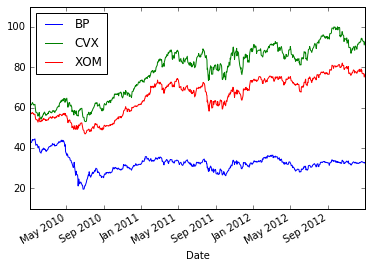

In [29]:
prices.plot()

In [ ]:
rets = prices.pct_change()
corr = rets.corr